### In this project I am analyzing the dataset from https://platform.stratascratch.com/data-projects/beer-data-analysis and answering these questions:

Rank the top 3 breweries which produce the strongest beers.
Which year did beers enjoy the highest ratings?
Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?
If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?
Which beer style seems to be the favourite based on the reviews written by users? How does written reviews compare to overall review score for the beer style?


In [ ]:
import os

# Get the current working directory
current_dir = os.getcwd()
print("Current working directory:", current_dir)

# Change the working directory to a new path
new_directory = "/Users/nigarmutallimova/Downloads/stratascratch projects"
os.chdir(new_directory)

# Check if the working directory has changed
updated_dir = os.getcwd()
print("Updated working directory:", updated_dir)


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv("BeerDataScienceProject.tar.bz2", compression="bz2")

In [5]:
df

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206
...,...,...,...,...,...,...,...,...,...,...,...,...,...
528865,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,3.5,orangemoustache,4.0,"A-pours a reddish amber that looks very nice,l...",1205212721
528866,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.5,3.0,3.0,MisterStout,3.0,I don't really have anything special to say ab...,1203490783
528867,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,4.0,4.5,4.0,meechum,4.5,Had this on tap at Vreny's Beirgarten A - Came...,1201320897
528868,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,4.0,Dodo2step,4.5,"Purchased at Market Cross Pub in carlisle, PA....",1201215290


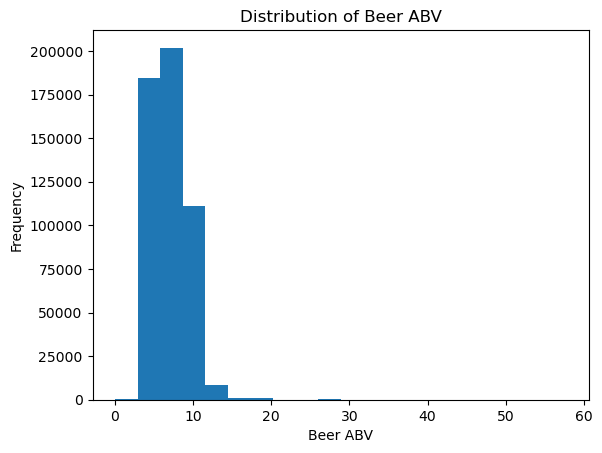

In [50]:
df['beer_ABV'].plot(kind='hist', bins=20)
plt.xlabel('Beer ABV')
plt.ylabel('Frequency')
plt.title('Distribution of Beer ABV')
plt.show()

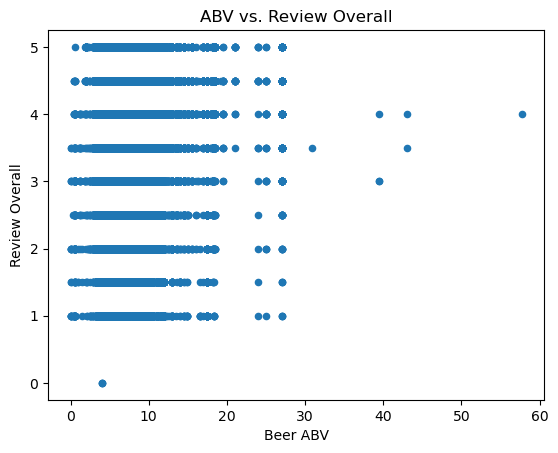

In [51]:
df.plot(x='beer_ABV', y='review_overall', kind='scatter')
plt.xlabel('Beer ABV')
plt.ylabel('Review Overall')
plt.title('ABV vs. Review Overall')
plt.show()


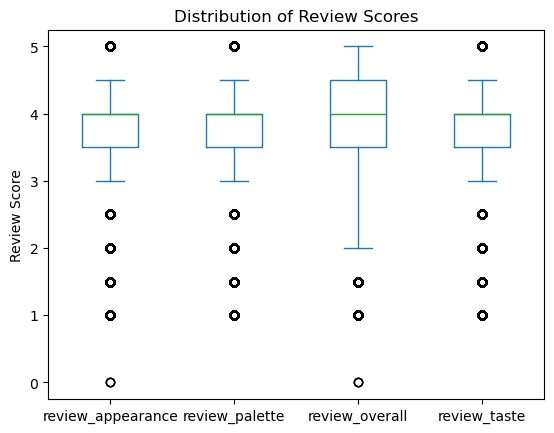

In [52]:
review_columns = ['review_appearance', 'review_palette', 'review_overall', 'review_taste']
df[review_columns].plot(kind='box')
plt.ylabel('Review Score')
plt.title('Distribution of Review Scores')
plt.show()


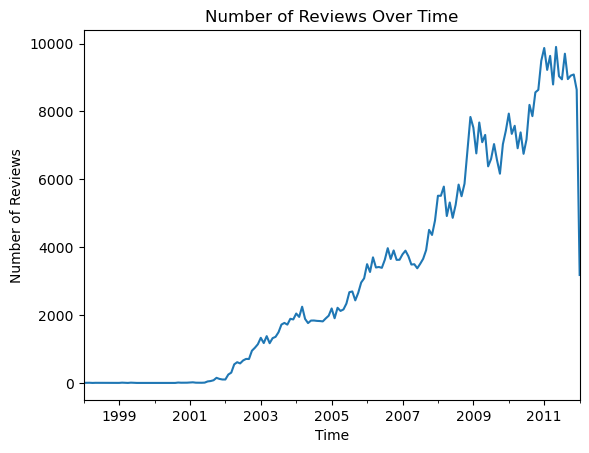

In [53]:
# Convert the 'review_time' column to datetime if it's not already
df['review_time'] = pd.to_datetime(df['review_time'], unit='s')
df.set_index('review_time')['beer_name'].resample('M').count().plot(kind='line')
plt.xlabel('Time')
plt.ylabel('Number of Reviews')
plt.title('Number of Reviews Over Time')
plt.show()


In [7]:
df_sorted = df.sort_values(by='beer_ABV', ascending=False)

In [8]:
df_sorted

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
12889,57.70,73368,6513,Schorschbräu Schorschbock 57%,Eisbock,4.0,4.0,4.0,4.0,kappldav123,3.5,"New world strongest beer. Very limited, only 3...",1316780901
12909,43.00,57856,6513,Schorschbräu Schorschbock 43%,Eisbock,3.5,4.0,4.0,4.0,Sunnanek,4.0,43% ABV - this is so crazy! A: Pour is warm am...,1309974178
12910,43.00,57856,6513,Schorschbräu Schorschbock 43%,Eisbock,4.0,4.0,3.5,4.0,kappldav123,4.5,"The bottle looks really great, handnumbered an...",1274469798
12911,39.44,55712,6513,Schorschbräu Schorschbock 40%,Eisbock,3.0,3.0,3.0,2.0,orangesol,3.0,Thanks to foofaa for sharing his sample with m...,1321041551
12913,39.44,55712,6513,Schorschbräu Schorschbock 40%,Eisbock,4.5,4.5,4.0,4.0,kappldav123,4.5,The new world strongest beer - I thing it will...,1264684153
...,...,...,...,...,...,...,...,...,...,...,...,...,...
528865,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,3.5,orangemoustache,4.0,"A-pours a reddish amber that looks very nice,l...",1205212721
528866,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.5,3.0,3.0,MisterStout,3.0,I don't really have anything special to say ab...,1203490783
528867,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,4.0,4.5,4.0,meechum,4.5,Had this on tap at Vreny's Beirgarten A - Came...,1201320897
528868,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,4.0,Dodo2step,4.5,"Purchased at Market Cross Pub in carlisle, PA....",1201215290


In [18]:
import pandas as pd

# Assuming you have a DataFrame named 'df' and columns named 'beer_company' and 'beer_ABV'
# Group the DataFrame by 'beer_company' and get the top 3 companies with the highest ABV
top_3_beer_companies = df.groupby('beer_name')['beer_ABV'].nlargest(3).reset_index(level=0)

# Now 'top_3_beer_companies' contains the first 3 beer companies with the highest ABV values


In [19]:
top_3_beer_companies

,beer_name,beer_ABV
432191,"""100"" Pale Ale",6.6
327823,"""33"" Export",4.8
327824,"""33"" Export",4.8
327825,"""33"" Export",4.8
322078,"""76"" Anniversary Ale",7.6
...,...,...
477063,à L'Agave Et Au Citron Vert,5.0
477064,à L'Agave Et Au Citron Vert,5.0
178246,überPils,7.6
178247,überPils,7.6


In [23]:
import pandas as pd

# Assuming you have a DataFrame named 'df' and columns named 'beer_company' and 'beer_ABV'
# Sort the DataFrame by 'beer_ABV' in descending order
sorted_df = df.sort_values(by='beer_ABV', ascending=False)

# Drop duplicates based on 'beer_company' to keep only the highest ABV for each company
unique_beer_companies = sorted_df.drop_duplicates(subset='beer_name')

# Select the first 3 distinct beer companies with the highest ABV
top_3_beer_companies = unique_beer_companies.head(10)

# Now 'top_3_beer_companies' contains the first 3 beer companies with the highest ABV values


In [24]:
top_3_beer_companies

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
12889,57.70,73368,6513,Schorschbräu Schorschbock 57%,Eisbock,4.0,4.0,4.0,4.0,kappldav123,3.5,"New world strongest beer. Very limited, only 3...",1316780901
12909,43.00,57856,6513,Schorschbräu Schorschbock 43%,Eisbock,3.5,4.0,4.0,4.0,Sunnanek,4.0,43% ABV - this is so crazy! A: Pour is warm am...,1309974178
12911,39.44,55712,6513,Schorschbräu Schorschbock 40%,Eisbock,3.0,3.0,3.0,2.0,orangesol,3.0,Thanks to foofaa for sharing his sample with m...,1321041551
12888,30.86,51466,6513,Schorschbräu Schorschbock 31%,Eisbock,4.0,4.0,3.5,4.0,kappldav123,4.5,Bottle @ home (of course not the whole bottle ...,1248785936
293778,27.00,25759,35,Samuel Adams Utopias,American Strong Ale,4.5,4.5,4.0,4.5,largadeer,5.0,"2009 bottle, 1 oz poured into a snifter. The b...",1258421753
286279,25.00,9840,35,Samuel Adams Utopias MMIII,American Strong Ale,5.0,5.0,4.5,4.5,vitriola,4.5,"Warm and inviting, it is. Rich, deep golden co...",1078507923
317618,25.00,41120,35,Samuel Adams Utopias (Aged On Cocoa Nibs),American Strong Ale,4.0,2.0,4.0,3.0,KingGorman,4.5,I had this at the EBF NOTB with Jim Koch himse...,1219708383
297510,24.00,2683,35,Samuel Adams Utopias MMII,American Strong Ale,4.0,4.0,4.5,5.0,comat0se,5.0,Sample from a cask at the 1st Annual Boulder S...,1044808752
284101,21.00,1640,35,Samuel Adams Millennium,American Strong Ale,4.0,3.5,4.0,4.0,bieristgut,4.0,Bottle # 2421. Same cider apperance as the Uto...,1079833306
62148,19.50,61328,16866,Cherry Chocolate Rain,American Double / Imperial Stout,4.0,5.0,4.0,5.0,SpdKilz,5.0,I have been meaning to review this but have be...,1288811516


### 3 companies producting strongest bees are Schorschbräu Schorschbock, Samuel Adams, Cherry Chocolate Rain

In [26]:
# Assuming you have a DataFrame named 'df' and columns named 'beer_company' and 'beer_ABV'
# Sort the DataFrame by 'beer_ABV' in descending order
sorted_ratings_df = df.sort_values(by='review_overall', ascending=False)

# Drop duplicates based on 'beer_company' to keep only the highest ABV for each company
unique_beer_companies = sorted_ratings_df.drop_duplicates(subset='review_overall')

# Select the first 3 distinct beer companies with the highest ABV
top_3_rating_companies = unique_beer_companies.head(10)

# Now 'top_3_beer_companies' contains the first 3 beer companies with the highest ABV values


In [27]:
top_3_rating_companies

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
338785,9.20,1696,207,Trappistes Rochefort 8,Dubbel,4.0,4.5,5.0,4.0,zeff80,4.5,A - Pours out a reddish/brown color with a thr...,1166570949
133864,10.00,31323,5318,Hop 15,American Double / Imperial IPA,4.5,3.5,4.5,4.5,StrangeBrewer76,4.0,Pours a copper brown with a nice foamy 1 finge...,1235328539
377203,9.00,30,22,Trois Pistoles,Belgian Strong Dark Ale,4.0,4.5,4.0,4.0,Mora2000,4.0,The beer pours a dark brown color with some ni...,1293852461
452125,4.25,6228,590,Totally Naked,American Pale Lager,3.5,3.5,3.5,3.5,palliko,3.5,Appearance is light yellow with some white foa...,1154667836
54880,NaN,5636,81,Buckler,Low Alcohol Beer,1.0,2.0,3.0,2.5,theozag,1.5,Buckler pours light yellow and settles medium ...,1070335428
354214,5.40,40528,306,Rising Moon Spring Ale,American Amber / Red Ale,3.0,2.5,2.5,3.0,Portertime,3.0,So this is Blue Moon's attempt at a spring ale...,1208447551
354216,5.40,40528,306,Rising Moon Spring Ale,American Amber / Red Ale,3.0,2.5,2.0,2.5,getch,2.0,"a-amber color, with some cloudiness, s-malt sm...",1208051555
348852,5.00,1466,306,Coors Extra Gold,American Adjunct Lager,1.5,2.0,1.5,2.5,tesguino,2.0,a beer from the rockies; good graphic design; ...,1172094468
260108,9.00,9970,881,Camo Silver ICE,American Malt Liquor,3.0,2.0,1.0,2.5,TexIndy,1.5,Got from Scoobydank as an extra ugly in The Go...,1222391047
39638,4.00,3810,1413,Utah Pale Ale,American Pale Ale (APA),0.0,3.0,0.0,2.0,beernut7,2.0,This American pale ale has a spicy grassy hop ...,1030266889


### 3 companies with highest rating are: Trappistes Rochefort 8, Hop 15, Trois Pistoles

In [30]:
correlation_matrix = sorted_ratings_df[['review_taste', 'review_aroma', 'review_appearance', 'review_palette', 'review_overall']].corr()

In [31]:
correlation_matrix

,review_taste,review_aroma,review_appearance,review_palette,review_overall
review_taste,1.000000,0.725273,0.554775,0.604271,0.692454
review_aroma,0.725273,1.000000,0.534244,0.706156,0.783002
review_appearance,0.554775,0.534244,1.000000,0.547691,0.486687
review_palette,0.604271,0.706156,0.547691,1.000000,0.601971
review_overall,0.692454,0.783002,0.486687,0.601971,1.000000


### Based on the correlation matrix, it seems that aroma is most contributing factor, then goes taste, palette and in the end appearance

#### I would find the beers with the best aroma - cause it's very significant factor

### Still, I would recommend: Trappistes Rochefort 8, Hop 15, Trois Pistoles

In [32]:
# Group by 'beer_style' and calculate aggregate statistics
beer_style_stats = df.groupby('beer_style').agg({
    'review_overall': 'mean',    # Average overall review score for each style
    'review_text': 'count'            # Count of reviews for each style
}).reset_index()

In [33]:
beer_style_stats

,beer_style,review_overall,review_text
0,Altbier,3.874595,3707
1,American Adjunct Lager,3.118017,9612
2,American Amber / Red Ale,3.857803,18728
3,American Amber / Red Lager,3.387564,2935
4,American Barleywine,3.920558,10107
...,...,...,...
99,Vienna Lager,3.919614,4607
100,Weizenbock,3.951051,2235
101,Wheatwine,3.817059,891
102,Winter Warmer,3.714012,5993


In [36]:
beer_style_stats_sorted = beer_style_stats.sort_values(by='review_text', ascending=False)
beer_style_stats_sorted

,beer_style,review_overall,review_text
12,American IPA,3.989785,43364
9,American Double / Imperial IPA,3.951199,26101
11,American Double / Imperial Stout,4.100518,23352
14,American Pale Ale (APA),3.869786,20514
2,American Amber / Red Ale,3.857803,18728
...,...,...,...
91,Sahti,3.467626,139
72,Kvass,3.877119,118
62,Gose,3.594444,90
64,Happoshu,2.818182,55


In [46]:
beer_style_stats_sortedd = beer_style_stats_sorted.sort_values(by='review_overall', ascending=False)
beer_style_stats_sortedd

,beer_style,review_overall,review_text
63,Gueuze,4.140952,1575
27,Berliner Weissbier,4.133976,933
11,American Double / Imperial Stout,4.100518,23352
83,Oatmeal Stout,4.080768,6720
41,Eisbock,4.079487,195
...,...,...,...
76,Light Lager,2.913462,4471
64,Happoshu,2.818182,55
54,Euro Strong Lager,2.817995,727
13,American Malt Liquor,2.722183,1410


In [47]:
# Set the option to display all rows
pd.set_option('display.max_rows', None)

# Display the sorted DataFrame with all rows
print(beer_style_stats_sortedd)

                              beer_style  review_overall  review_text
63                                Gueuze        4.140952         1575
27                    Berliner Weissbier        4.133976          933
11      American Double / Imperial Stout        4.100518        23352
83                         Oatmeal Stout        4.080768         6720
41                               Eisbock        4.079487          195
90                              Rye Beer        4.069994         5179
38             Dortmunder / Export Lager        4.051962         1809
86                      Quadrupel (Quad)        4.049250         4933
88                            Roggenbier        4.032680          153
74                        Lambic - Fruit        4.027070         3768
89                Russian Imperial Stout        4.025651        17183
75                    Lambic - Unblended        4.010638          705
25               Belgian Strong Dark Ale        4.009249        15403
12                  

In [35]:
# Find the beer style with the highest average overall review score
favorite_beer_style = beer_style_stats.loc[beer_style_stats['review_overall'].idxmax()]

print("Favorite Beer Style:")
print(favorite_beer_style)

Favorite Beer Style:
beer_style          Gueuze
review_overall    4.140952
review_text           1575
Name: 63, dtype: object


In [38]:
pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 2.4 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [42]:
import pandas as pd
from textblob import TextBlob

# Assuming you have a DataFrame named 'reviews_df' with columns: 'review_text', 'beer_style', 'overall_review_score'

# Define a function to perform sentiment analysis on each review
def get_sentiment(review):
    if isinstance(review, str):
        blob = TextBlob(review)
        sentiment_score = blob.sentiment.polarity
        if sentiment_score > 0:
            return 'positive'
        elif sentiment_score < 0:
            return 'negative'
        else:
            return 'neutral'
    else:
        return 'unknown'  # Handle missing or non-text values

# Apply the sentiment analysis function to the 'review_text' column and create a new 'sentiment' column
df['sentiment'] = df['review_text'].apply(get_sentiment)

# Group by 'beer_style' and calculate aggregate statistics including sentiment distribution
beer_style_stats = df.groupby(['beer_style', 'sentiment']).size().reset_index(name='count')

# Display the sentiment distribution for each beer style
print(beer_style_stats)


                 beer_style sentiment  count
0                   Altbier  negative    197
1                   Altbier   neutral      3
2                   Altbier  positive   3507
3                   Altbier   unknown      1
4    American Adjunct Lager  negative   1371
..                      ...       ...    ...
324           Winter Warmer   unknown      2
325                 Witbier  negative    687
326                 Witbier   neutral      6
327                 Witbier  positive  12840
328                 Witbier   unknown      2

[329 rows x 3 columns]


In [43]:
# Assuming 'beer_style_stats' is the DataFrame containing sentiment distribution for each beer style
# Filter the DataFrame to separate positive and negative reviews
positive_reviews_df = beer_style_stats[beer_style_stats['sentiment'] == 'positive']
negative_reviews_df = beer_style_stats[beer_style_stats['sentiment'] == 'negative']

# Sort the DataFrames by the count of positive and negative reviews in descending order
top_5_positive_companies = positive_reviews_df.nlargest(5, 'count')
top_5_negative_companies = negative_reviews_df.nlargest(5, 'count')

# Display the top 5 companies with the highest number of positive and negative reviews
print("Top 5 Companies with Highest Positive Reviews:")
print(top_5_positive_companies)

print("\nTop 5 Companies with Highest Negative Reviews:")
print(top_5_negative_companies)


Top 5 Companies with Highest Positive Reviews:
                          beer_style sentiment  count
45                      American IPA  positive  42026
34    American Double / Imperial IPA  positive  25306
41  American Double / Imperial Stout  positive  22236
53           American Pale Ale (APA)  positive  19544
10          American Amber / Red Ale  positive  17898

Top 5 Companies with Highest Negative Reviews:
                           beer_style sentiment  count
4              American Adjunct Lager  negative   1371
43                       American IPA  negative   1322
280            Russian Imperial Stout  negative   1150
39   American Double / Imperial Stout  negative   1108
61                    American Porter  negative   1108


In [44]:
# Assuming 'beer_style_stats' is the DataFrame containing sentiment distribution for each beer style
# Group the DataFrame by 'beer_style' to get the total count of reviews for each company
total_reviews_df = beer_style_stats.groupby('beer_style')['count'].sum().reset_index()

# Merge the total_reviews_df with the positive and negative reviews DataFrames
positive_reviews_df = pd.merge(positive_reviews_df, total_reviews_df, on='beer_style', suffixes=('_positive', '_total'))
negative_reviews_df = pd.merge(negative_reviews_df, total_reviews_df, on='beer_style', suffixes=('_negative', '_total'))

# Calculate the percentage of positive and negative reviews for each company
positive_reviews_df['percentage_positive'] = (positive_reviews_df['count_positive'] / positive_reviews_df['count_total']) * 100
negative_reviews_df['percentage_negative'] = (negative_reviews_df['count_negative'] / negative_reviews_df['count_total']) * 100

# Sort the DataFrames by the percentage of positive and negative reviews in descending order
top_5_positive_companies = positive_reviews_df.nlargest(5, 'percentage_positive')
top_5_negative_companies = negative_reviews_df.nlargest(5, 'percentage_negative')

# Display the top 5 companies with the highest percentage of positive and negative reviews
print("Top 5 Companies with Highest Percentage of Positive Reviews:")
print(top_5_positive_companies)

print("\nTop 5 Companies with Highest Percentage of Negative Reviews:")
print(top_5_negative_companies)


Top 5 Companies with Highest Percentage of Positive Reviews:
                   beer_style sentiment  count_positive  count_total  \
88                 Roggenbier  positive             150          153   
38  Dortmunder / Export Lager  positive            1772         1809   
72                      Kvass  positive             115          118   
23                Belgian IPA  positive            3929         4045   
99               Vienna Lager  positive            4470         4609   

    percentage_positive  
88            98.039216  
38            97.954671  
72            97.457627  
23            97.132262  
99            96.984161  

Top 5 Companies with Highest Percentage of Negative Reviews:
              beer_style sentiment  count_negative  count_total  \
77      Low Alcohol Beer  negative              51          219   
64              Happoshu  negative              11           55   
13  American Malt Liquor  negative             271         1411   
76           Light L

### It seems Dortmunder / Export Lager is both the best among the positive reviews and ratings - it has both very high